# Etapas:
1.   **Conversão de Dicom (.dcm) para .jpg**
2.   **Extração de Características:**
        *   dataset_raiox_features_adjusted.csv
            *   **FEATURE1** = Histograma de Cor
            *   **FEATURE2** = Haralick
            *   **FEATURE3** = LBP
            *   **FEATURE4** = Zernike
            *   **FEATURE5** = Combinação HUmoment **+** Haralick **+** Histograma de Cor
        *   dataset_texture_features_raiox.csv
            *   **FEATURE1** = FOS
            *   **FEATURE2** = GLCM
            *   **FEATURE3** = GLDS
            *   **FEATURE4** = NGTDM
            *   **FEATURE5** = SFM
            *   **FEATURE6** = LTE
            *   **FEATURE7** = FPS
            *   **FEATURE8** = LBP
            *   **FEATURE9** = LPQ
            *   **FEATURE10** = HUMoments
            *   **FEATURE11** = FOS + GLCM + GLDS + NGTDM + SFM + LTE + FPS
            *   **FEATURE12** = FOS + GLCM + GLDS + NGTDM + SFM + LTE + FPS + LBP + LPQ + HUMoments
        *   kaggle_combination_dataset_texture_feature.csv
        *   ribeirao_combination_dataset_texture_features_raiox.csv
            *   **FEATURE1** = FOS
            *   **FEATURE2** = GLCM
            *   **FEATURE3** = NGTDM
            *   **FEATURE4** = LPQ
            *   **FEATURE5** = FOS + GLCM
            *   **FEATURE6** = FOS + NGTDM
            *   **FEATURE7** = FOS + LPQ
            *   **FEATURE8** = GLCM + NGTDM
            *   **FEATURE9** = GLCM + LPQ
            *   **FEATURE10** = NGTDM + LPQ
            *   **FEATURE11** = FOS + GLCM + NGTDM
            *   **FEATURE12** = FOS + GLCM + LPQ
            *   **FEATURE13** = FOS + NGTDM + LPQ
            *   **FEATURE14** = GLCM + NGTDM + LPQ
3.   **Descrição dos dados (Dataset Ribeirão Preto):**
    *   190 imagens COVID
    *   310 imagens INTERSTICIAIS-NÃO-COVID
    *   381 imagens NORMAIS

3.   **Descrição dos dados (Dataset Kaggle)**
    *   250 imagens COVID
    *   250 imagens NORMAIS
    *   250 imagens viral_pneumonia    
    *   250 imagens lung_infection

4.   **Formato do CSV:**

|Índice|Imagem|Feature1|Feature2|Feature3|...|FeatureN|Category|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|0|1.jpg|list [...]|list [...]|list [...]|...|list [...]|Class|

5.   **Dimensionalidade dos dados:**

*  dataset_raiox_features_adjusted.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|
|:--:|:--:|:--:|:--:|:--:|
|512|13|108|36|536|

*  dataset_texture_features_raiox.csv
*  kaggle_dataset_texture_features_raiox.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|Feature6|Feature7|Feature8|Feature9|Feature10|Feature11|Feature12|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|16|28|5|5|4|6|2|59|256|11|66|381|

*  kaggle_combination_dataset_texture_feature.csv
*  ribeirao_combination_dataset_texture_features_raiox.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|Feature6|Feature7|Feature8|Feature9|Feature10|Feature11|Feature12|Feature13|Feature14|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|16|28|5|255|44|21|271|33|283|260|49|299|276|288|

# Leitura dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Retorna os dados extraidos em formato de lista
def split_data(input, feature_name, size):
    image_ids = []
    image_features = []
    image_categories = []
    for i in range(size):
        x = [ float(v) for v in input.iloc[i][feature_name][1:-1].split(", ") ] #Inicialmente, os valores estavam sendo considerados como uma string. Portanto foi necessario remover os colchetes com o [1:-1] e fazer o split dos dados
        x = np.array(x)
        image_features.append(x)
        image_ids.append(input.iloc[i].Image)
        image_categories.append(input.iloc[i].Category)
    return image_ids, image_features, image_categories

In [2]:
#Leitura do Dataset
#input = pd.read_csv("dataset_raiox_features_initial.csv") #First Test
#input = pd.read_csv("dataset_raiox_features_adjusted.csv") #Second Test
#input = pd.read_csv("dataset_texture_features_raiox.csv") #Third Test
#input = pd.read_csv("kaggle_dataset_texture_features_raiox.csv") #Third Test
#input = pd.read_csv("kaggle_combination_dataset_texture_feature.csv") #Fourth Test
input = pd.read_csv("dataset_texture_features_raiox.csv") #Fifth Test

#Classes no dataset
print("\nDataset completo:")
print(input["Category"].value_counts())

#Obtendo os indices da classe a ser removida: lung_infection
idx = input.index[input['Category'] == "intersticiais-nao-covid"]
#Removendo instancias
input.drop(idx, inplace=True)

#print("\nDataset com 2 classes:")
print(input["Category"].value_counts())


Dataset completo:
normais                    381
intersticiais-nao-covid    307
covid                      199
Name: Category, dtype: int64
normais    381
covid      199
Name: Category, dtype: int64


In [3]:
#Atualizando indices (Removendo os 'furos' dos drops)
input = input.reset_index()
input = input.drop('index', axis=1)
input

Image                                           Feature1  \
0      png_file1.png  [159.73137678198538, 3353.0641194236914, 174.0...   
1     png_file10.png  [147.37609277959123, 3381.9115392909216, 151.0...   
2    png_file100.png  [133.70682040447412, 3046.9665689018298, 146.0...   
3    png_file101.png  [102.65635647800579, 1575.218839566936, 104.0,...   
4    png_file102.png  [154.92156823266663, 1814.0330514952689, 153.0...   
..               ...                                                ...   
575           95.png  [169.438482308506, 2772.077470681234, 185.0, 2...   
576           96.png  [119.18846896260098, 3987.784415150261, 126.0,...   
577           97.png  [167.244904529076, 2451.503552696221, 180.0, 2...   
578           98.png  [147.8529951084023, 5641.144581291419, 172.0, ...   
579           99.png  [128.49945662317677, 4066.462548611157, 139.0,...   

                                              Feature2  \
0    [0.0008512439438940027, 53.29101558467067, 0.9...   
1    [0.0014388223415054205, 36.65331393257317, 0.9...   
2    [0.0012355290889578155, 45.148716767405844, 0....   
3    [0.0009779764177579586, 30.509819339844135, 0....   
4    [0.0008598571923598621, 29.041498227935243, 0....   
..                                                 ...   
575  [0.0011789511791429575, 49.753104672738395, 0....   
576  [0.0003185674747234916, 64.27475332274557, 0.9...   
577  [0.0008050225684180619, 51.857787579697145, 0....   
578  [0.0011080768510293563, 73.31965968594662, 0.9...   
579  [0.0004028248801954665, 135.71117344351134, 0....   

                                              Feature9 Category  
0    [0.002609232489603839, 0.0023646169437034795, ...    covid  
1    [0.0020151661638458224, 0.0021549464757888853,...    covid  
2    [0.0023413202250463024, 0.0018287924145884051,...    covid  
3    [0.0032964856899905647, 0.002352968584374891, ...    covid  
4    [0.0022830784284033592, 0.001432748197416394, ...    covid  
..                                                 ...      ...  
575  [0.0031334086593903247, 0.0019569243672028793,...  normais  
576  [0.04556838169343848, 0.0021083530384745307, 0...  normais  
577  [0.0023180235063891253, 0.002259781709746182, ...  normais  
578  [0.12541788489091313, 0.0018287924145884051, 0...  normais  
579  [0.06863213316404385, 0.0020384628825029995, 0...  normais  

[580 rows x 5 columns]

In [4]:
#Definindo as features e as funcoes de distancia
feature_names = ["Feature1", "Feature2","Feature9"] #[f for f in input.columns[1:-1]]
#distance_functions = ["euclidean", "cosine", "manhattan"] #Mesmas distancias: l1=manhattan=cityblock  e  l2=euclidean
seed = 42 #Semente de entrada para execucao das Tecnicas de Projecao Multidimensional
#distance_matrix_output = True #Ativa/Desativa a geracao dos arquivos contendo matrizes de dissimilaridade

#Numero de instancias do dataset
size = input.shape[0]
print("Total number of images: ", size)

print("\nDimensionality: ")
#Obtendo as features
image_ids = {}; image_features = {}; image_categories  = {};
for feature_name in feature_names:
    ids, features, categories = split_data(input, feature_name, size)
    print(feature_name, len(features[0]))
    image_ids[feature_name] = ids
    image_features[feature_name] = features
    image_categories[feature_name] = categories

Total number of images:  580

Dimensionality: 
Feature1 16
Feature2 28
Feature9 255


# Classificação

**Oversample**: Balanceando o dataset utilizando a técnica de oversampling

In [5]:
# from imblearn.over_sampling import RandomOverSampler

# def oversample_imblearn(inputs, targets):
#     oversample = RandomOverSampler(sampling_strategy='minority')
#     oversampled_data, oversampled_targets = oversample.fit_resample(inputs, targets)
#     return oversampled_data, oversampled_targets

In [6]:
# oversampled_data, oversampled_targets = oversample_imblearn(inputs, targets)

# input["Category"].value_counts()
# print(Counter(targets))
# print(Counter(oversampled_targets))

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler

"""
Funcao para classificacao do conjunto de dados passado
    inputs:     Variáveis de entrada (X)
    targets:    Variáveis alvo (y)
"""
def model_tester(inputs, targets, weights=None):
  results = {} #Armazena os resultados obtidos
  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(targets, pd.core.frame.DataFrame) or isinstance(targets, pd.core.series.Series):
    targets = targets.values
  
  testes = {
    "Nearest Neighbors" :  KNeighborsClassifier(3),
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB()
  }

  for teste in testes:
    clf = testes[teste]
    scores = []    
    
    skfold = StratifiedKFold(n_splits=10)
    for train_index, test_index in skfold.split(inputs, targets):
      X_train, X_test = inputs[train_index], inputs[test_index]
      y_train, y_test = targets[train_index], targets[test_index]
        
      # Sampling the data.
      #X_train, y_train = sampler_func(X_train, y_train)
      #y_train = y_train['Class'].to_numpy() 
      
      # Normalizing the data.
      scaler = MinMaxScaler().fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)
      
      # Fitting and predictions.
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      scores.append(balanced_accuracy_score(y_test, y_pred))
    avg_score = np.mean(scores)*100
    results[teste] = avg_score
    print("----Score do classificador '%s': %.2f" % (teste, avg_score))
  return results

In [8]:
#Definindo um grafico de barras personalizado
def bar_chart(classifiers, scores, title, x_label, y_label, size, further_info=""):
  fig, ax = plt.subplots(figsize = size)
  plt.grid(b=bool, which='both', axis='y', color='b', linestyle='-', linewidth=0.1)
  ind = np.arange(len(classifiers))    # the x locations for the groups
  width = 0.8                          # the width of the bars
  rects = ax.bar(ind, scores, width, bottom=0, color='r', edgecolor='k') #yerr=std Desvio Padrao
  ax.set_title(title + further_info)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_xticks(ind)
  ax.set_xticklabels( classifiers,
                      rotation=40,
                      horizontalalignment='right')
  
  #Definindo as legendas acima de cada caixa do histograma
  #Attach a text label above each bar in *rects*, displaying its height.
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  #rotation=90,
                  ha='center',
                  va='bottom')

  #Definindo os limites da imagem
  bottom, top = plt.ylim()         # return the current ylim
  #plt.ylim((bottom, top + 3.5))   # set the ylim to bottom, top
  plt.ylim((bottom, 100 + 5.5))          # set the ylim to bottom, top

  ax.autoscale_view()
  plt.tight_layout()
    
  #Exportando a figura
  fig_name = title + further_info + '.png'
  plt.savefig(fig_name)

  plt.show()

#  **Classificação aplicada aos Dados Originais**

In [9]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')


results = [] #Armazena os resultados da classificacao para cada Feature
#Executando os classificadores para todas as features extraidas
for feature_name in feature_names:
    print("\nExecutando classificadores: feature_name=" + feature_name)
    X = pd.DataFrame(image_features[feature_name]) 
    target_classes = [x for x in input['Category'].unique()]
    y = input['Category'].factorize(target_classes)[0]
    
    X_over, y_over = undersample.fit_resample(X, y)
    
    result = model_tester(X_over, y_over)
    results.append(result)


Executando classificadores: feature_name=Feature1
----Score do classificador 'Nearest Neighbors': 86.91
----Score do classificador 'SVM Linear': 88.17
----Score do classificador 'SVM Polinomial grau 3': 89.18
----Score do classificador 'Decision Tree (gini)': 83.13
----Score do classificador 'Random Forest': 87.21
----Score do classificador 'Neural Net': 88.17
----Score do classificador 'AdaBoost': 88.68
----Score do classificador 'Naive Bayes': 83.17

Executando classificadores: feature_name=Feature2
----Score do classificador 'Nearest Neighbors': 90.16
----Score do classificador 'SVM Linear': 90.93
----Score do classificador 'SVM Polinomial grau 3': 92.21
----Score do classificador 'Decision Tree (gini)': 84.38
----Score do classificador 'Random Forest': 89.17
----Score do classificador 'Neural Net': 91.70
----Score do classificador 'AdaBoost': 88.67
----Score do classificador 'Naive Bayes': 90.70

Executando classificadores: feature_name=Feature9
----Score do classificador 'Nearest

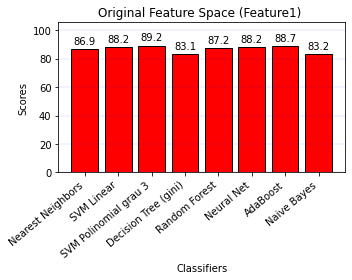

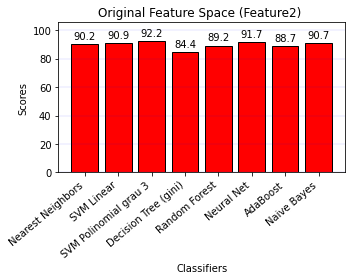

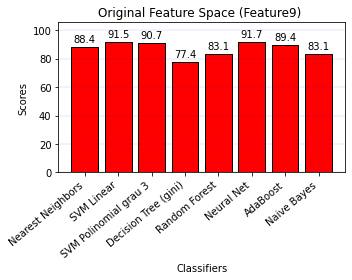

In [10]:
#Obtendo os scores dos classificadores
for idx, feature_name in enumerate(feature_names):
  classifiers = results[idx].keys()
  scores = [round(results[idx][i], 1) for i in classifiers]
  #print(feature_name, scores)
  further_info = " (" + feature_name + ") "
  bar_chart(classifiers, scores, 'Original Feature Space', 'Classifiers', 'Scores', (5,4), further_info)